<a href="https://colab.research.google.com/github/dedemasutti/data-science/blob/main/Ciencia_de_dados_aplicada_ao_com%C3%A9rcio_B2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados .txt e convertendo em .csv

In [2]:
# Carregar o arquivo CSV
with open("Dataset.txt", "r") as f:
    df = pd.read_csv(f)
    df.to_csv("Dataset.csv")

In [3]:
# Visualizando as 5 primeiras linhas do dataset com o método head
df.head()

,ID do Cliente,Localização do Cliente,Indústria do Cliente,Tamanho da Empresa do Cliente,Data da Transação,Valor da Transação,Produtos/Serviços Vendidos,Quantidade Vendida,Canal de Venda,Tipo de Transação,Tempo de Entrega,Satisfação do Cliente,Meio de Pagamento,Custo de Aquisição de Cliente (CAC),Margem de Lucro,Dados Demográficos do Cliente,Duração do Relacionamento,Campanhas de Marketing,Taxa de Conversão,Status da Conta
0,1,São Paulo,Manufatura,100-500 funcionários,2023-01-15,5000,Peças de máquinas,100,Online,Novo cliente,7 dias,4,Cartão de crédito,200,300,35-45 anos,6 meses,Campanha de e-mail,0.10,Ativa
1,2,Rio de Janeiro,Tecnologia,50-100 funcionários,2023-02-10,8000,Software de gestão,20,Telefone,Cliente existente,10 dias,5,Transferência bancária,150,500,25-35 anos,2 anos,Nenhuma,0.20,Ativa
2,3,Belo Horizonte,Saúde,500+ funcionários,2023-02-28,12000,Equipamentos médicos,5,Representante de vendas,Renovação de contrato,15 dias,4,Boleto bancário,300,800,45-55 anos,3 anos,Campanha de redes sociais,0.30,Ativa
3,4,Maceio,Manufatura,50-100 funcionários,2023-03-05,3500,Matéria-prima,500,Online,Novo cliente,5 dias,4,Transferência bancária,250,600,35-45 anos,1 mês,Nenhuma,0.15,Ativa
4,5,Recife,Consultoria,20-50 funcionários,2023-03-20,6000,Serviços de consultoria empresarial,10,Online,Cliente existente,8 dias,5,Cartão de crédito,180,700,45-55 anos,1 ano,Campanha de e-mail,0.25,Ativa


### Limpeza e Pré processamento dos dados

<ipython-input-4-f886a7b49454>:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descricao = df.describe(include='all')


        ID do Cliente Localização do Cliente Indústria do Cliente  \
count        49.00000                     49                   49   
unique            NaN                     18                    7   
top               NaN              São Paulo           Manufatura   
freq              NaN                      5                   11   
first             NaN                    NaN                  NaN   
last              NaN                    NaN                  NaN   
mean         25.00000                    NaN                  NaN   
std          14.28869                    NaN                  NaN   
min           1.00000                    NaN                  NaN   
25%          13.00000                    NaN                  NaN   
50%          25.00000                    NaN                  NaN   
75%          37.00000                    NaN                  NaN   
max          49.00000                    NaN                  NaN   

       Tamanho da Empresa do Clie

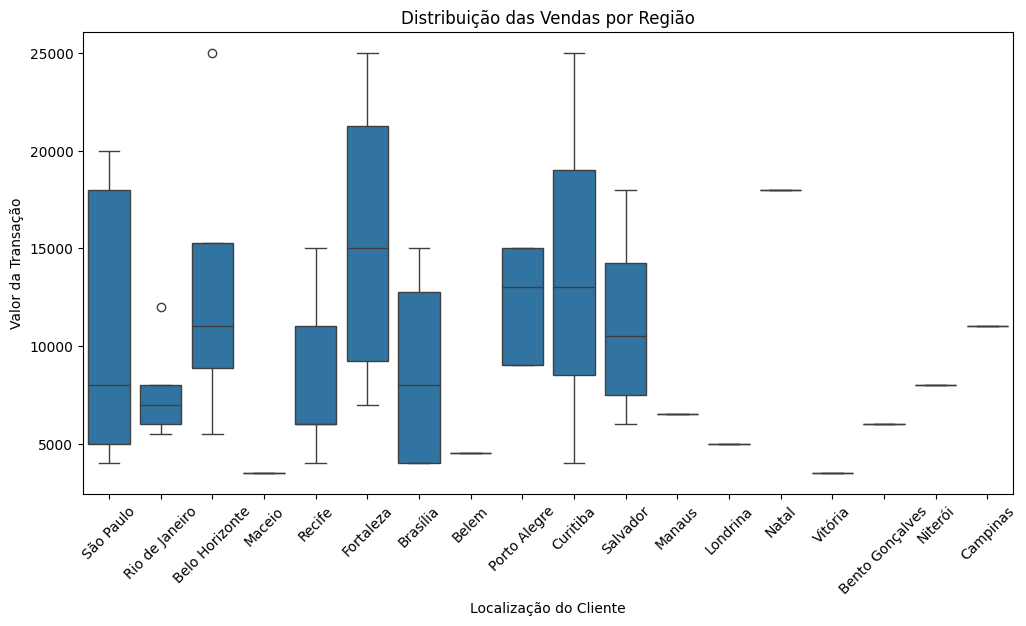

In [4]:
# Limpeza e preparação dos dados

# Removendo linhas com valores ausentes , caso exista
df.dropna(inplace=True)
# Converte a coluna de data para datetime
df['Data da Transação'] = pd.to_datetime(df['Data da Transação'])
# Criando uma coluna de ano-mês e calculando o valor da transação por produto
df['Ano-Mês'] = df['Data da Transação'].dt.to_period('M')
df['Valor da Transação por Produto'] = df['Valor da Transação'] / df['Quantidade Vendida']


# Análise descritiva
descricao = df.describe(include='all')
print(descricao)

# Visualização da distribuição das vendas por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='Localização do Cliente', y='Valor da Transação', data=df)
plt.title('Distribuição das Vendas por Região')
plt.xlabel('Localização do Cliente')
plt.ylabel('Valor da Transação')
plt.xticks(rotation=45)
plt.show()

### Machine Learning(Clusterização) para previsão de vendas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

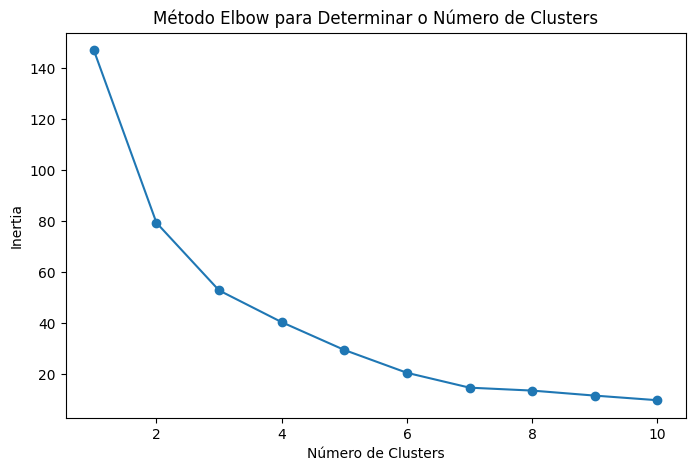

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


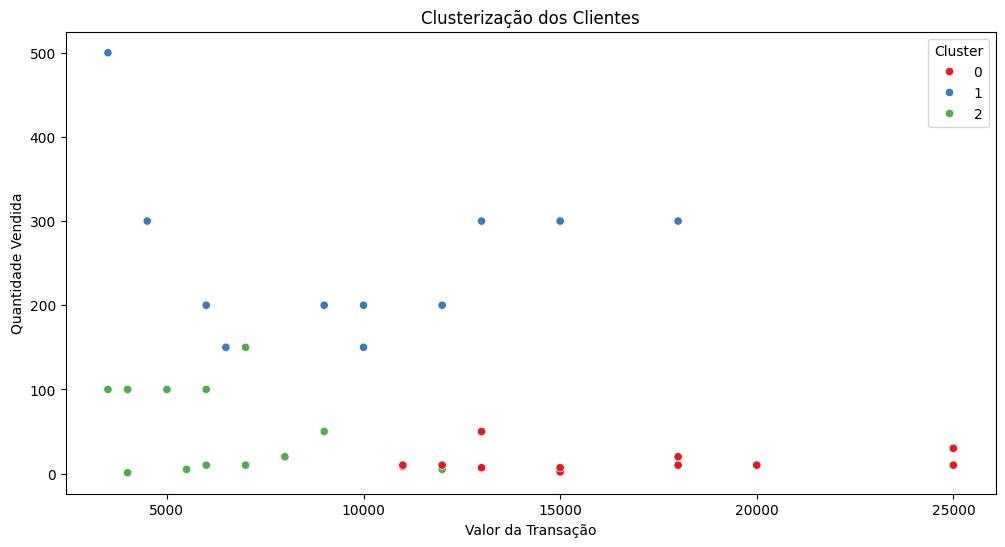

<ipython-input-5-feaf7f72de0a>:49: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = df.corr()


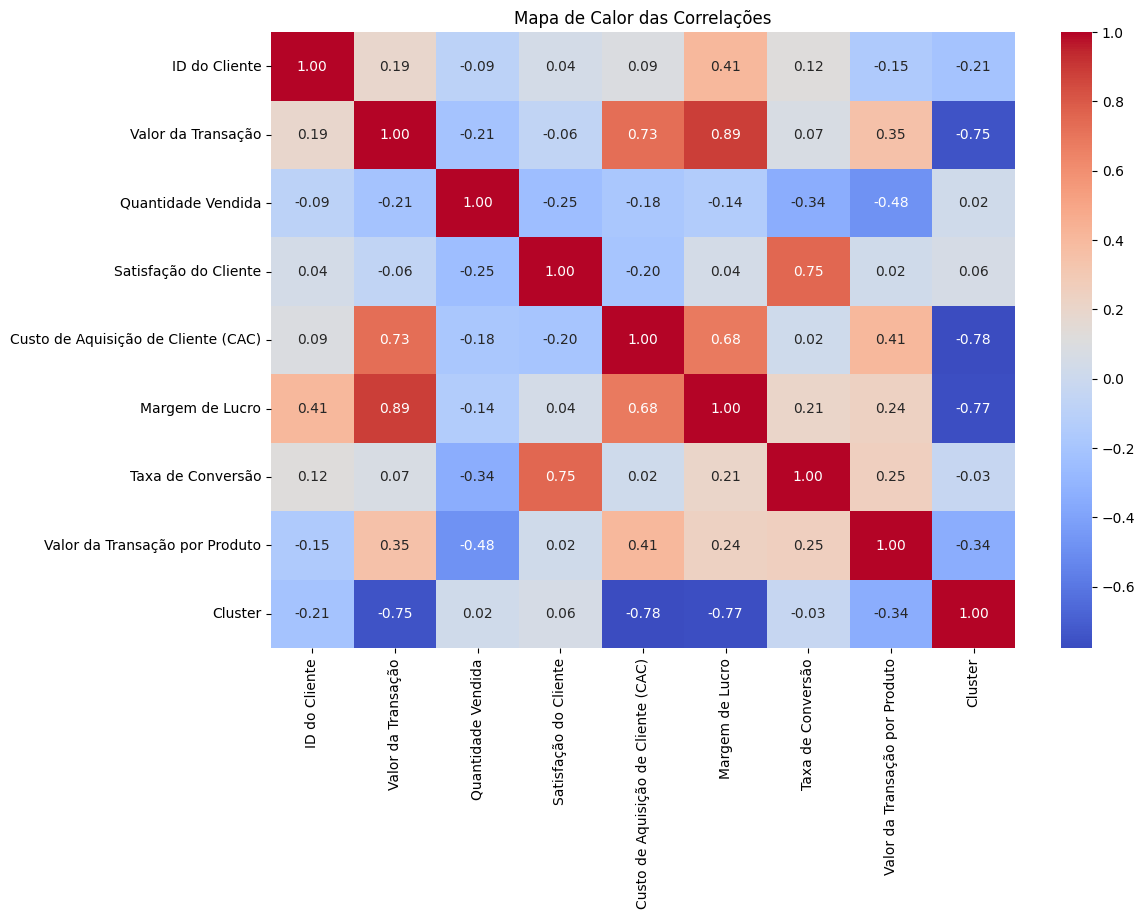

MSE: 322962.8054275256


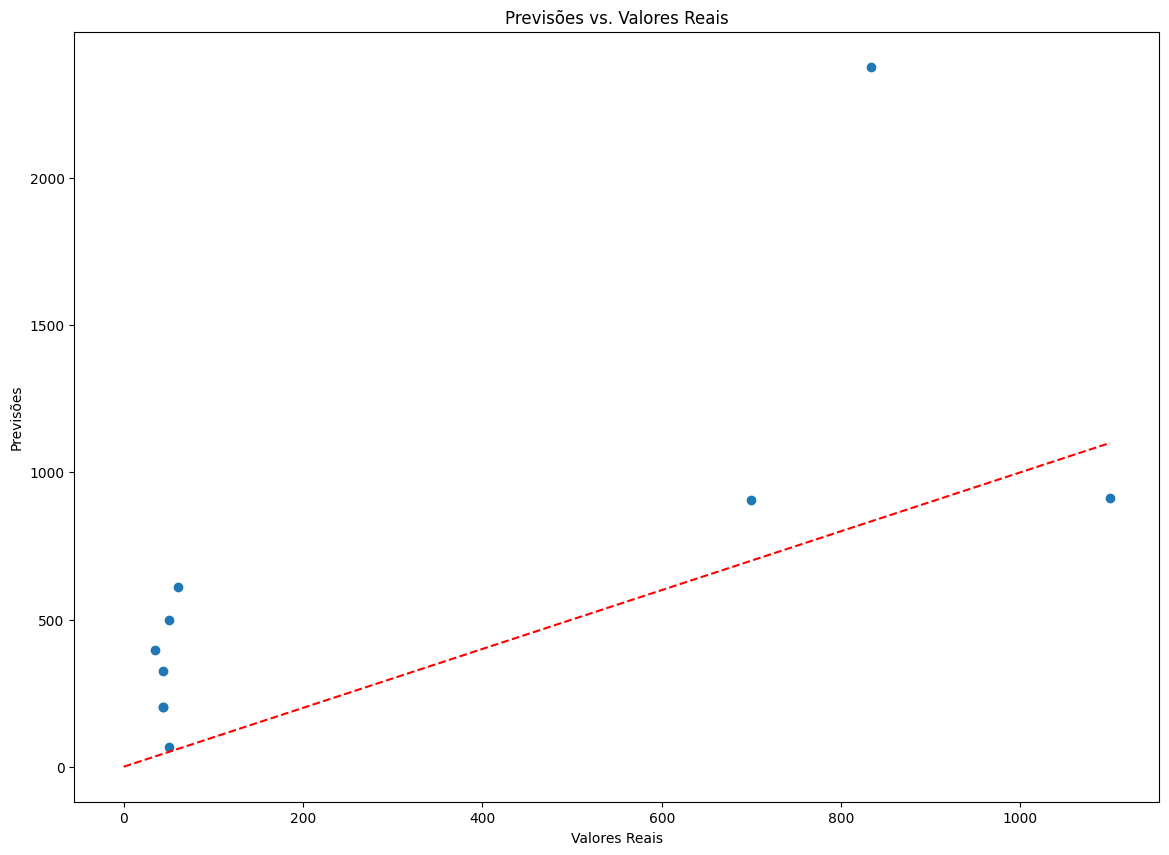

In [5]:
# Importando módulos do sklearn para Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error





# Análise de clusterização dos clientes
# Selecionar as variáveis relevantes para a clusterização
X = df[[ 'Valor da Transação', 'Quantidade Vendida', 'Margem de Lucro']]


# Padronizar as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

# Executar o algoritmo de clusterização com o número de clusters determinado
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Valor da Transação', y='Quantidade Vendida', hue='Cluster', data=df, palette='Set1')
plt.title('Clusterização dos Clientes')
plt.xlabel('Valor da Transação')
plt.ylabel('Quantidade Vendida')
plt.show()

# Análise diagnóstica
# Calcular as correlações entre as variáveis
correlacoes = df.corr()

# Visualizar as correlações em um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()

# Modelagem preditiva
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Valor da Transação por Produto'], test_size=0.2, random_state=42)

# Treinar um modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Visualizar as previsões vs. os valores reais
plt.figure(figsize=(14, 10))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

### Storytelling com gráficos

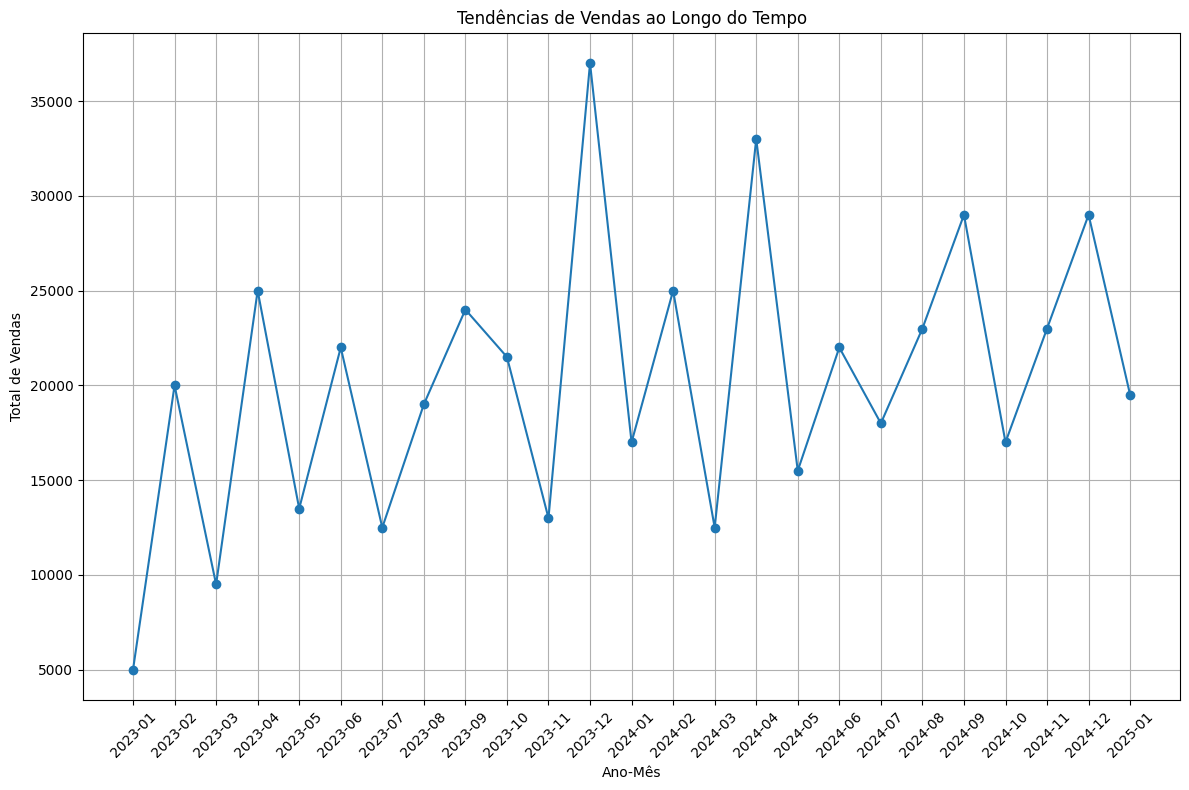

In [6]:
# Storytelling com gráficos
# Gráfico de linha mostrando as tendências de vendas ao longo do tempo
vendas_por_mes = df.groupby('Ano-Mês')['Valor da Transação'].sum()
plt.figure(figsize=(12, 8))
plt.plot(vendas_por_mes.index.astype(str), vendas_por_mes.values, marker='o', linestyle='-')
plt.title('Tendências de Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### SEGMENTAÇÃO DE CLIENTES E PREVISÕES

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

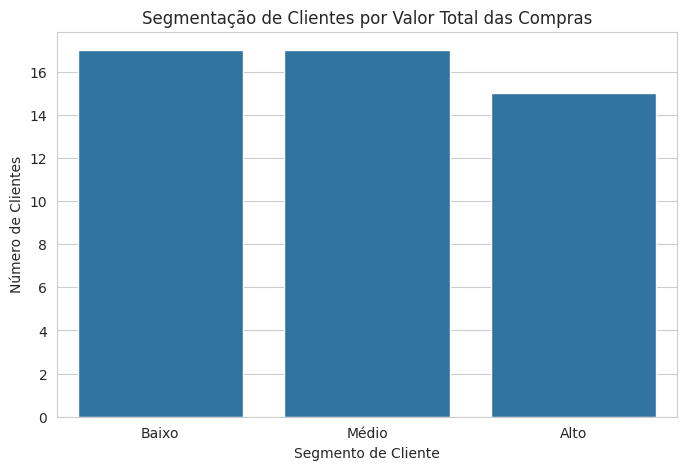

In [36]:
# Segmentar clientes com base no valor total das compras
df['Segmento de Cliente'] = pd.qcut(df['Valor da Transação'], q=3, labels=['Baixo', 'Médio', 'Alto'])

# Visualizar a distribuição dos segmentos de clientes
plt.figure(figsize=(8, 5))
sns.countplot(x='Segmento de Cliente', data=df, order=['Baixo', 'Médio', 'Alto'])
plt.title('Segmentação de Clientes por Valor Total das Compras')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Número de Clientes')
plt.show()

#### Análise de sazonalidade

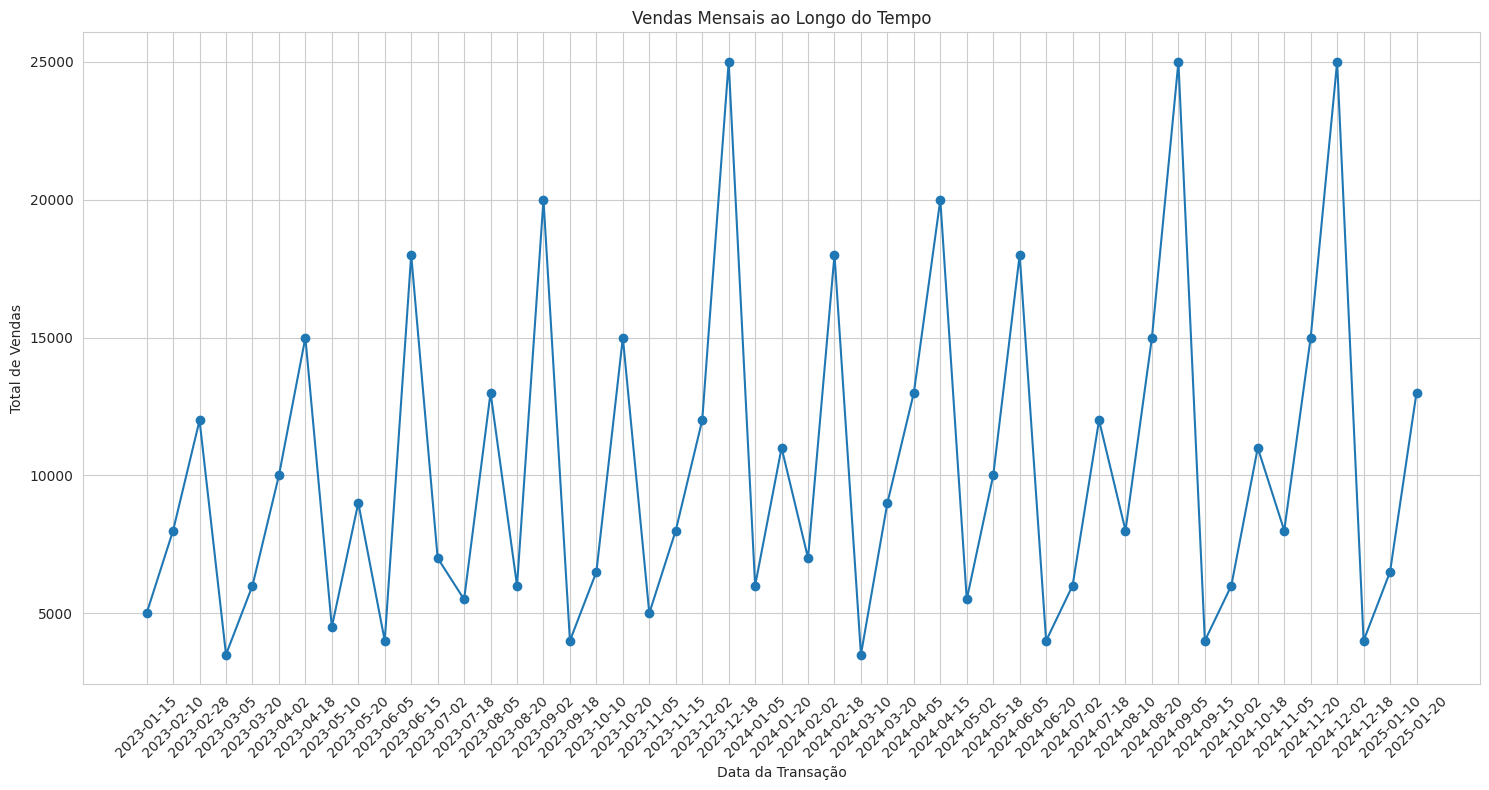

In [35]:
# Calcular as vendas mensais
vendas_por_mes = df.groupby('Data da Transação')['Valor da Transação'].sum()

# Visualizar as vendas mensais em um gráfico de linha
plt.figure(figsize=(15, 8))
plt.plot(vendas_por_mes.index.astype(str), vendas_por_mes.values, marker='o', linestyle='-')
plt.title('Vendas Mensais ao Longo do Tempo')
plt.xlabel('Data da Transação')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Previsão de vendas

MSE: 59944971.93621726


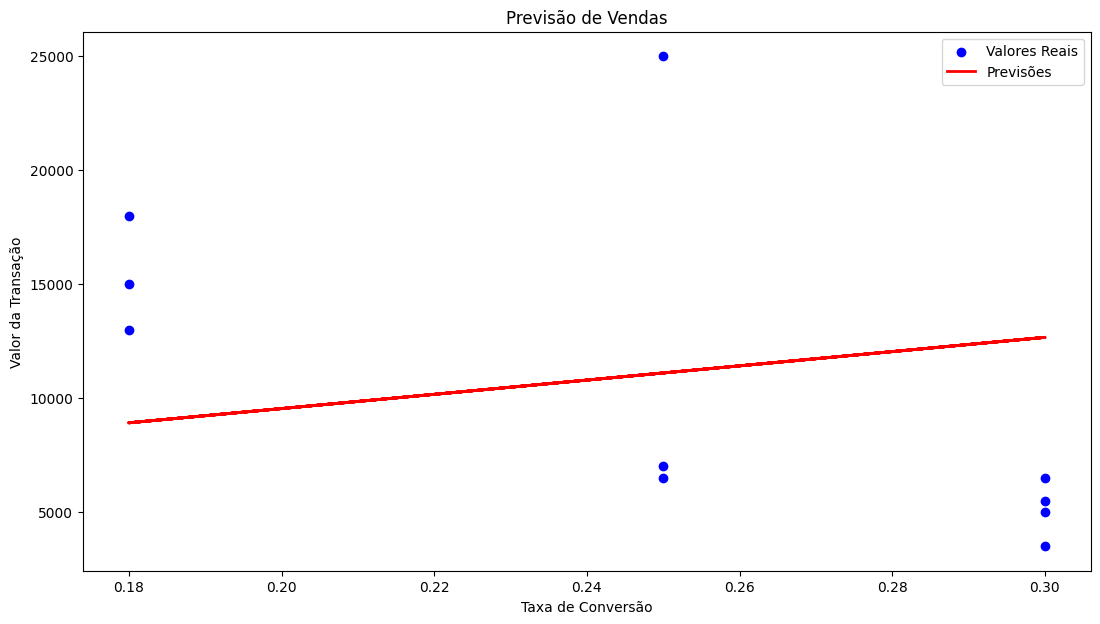

In [20]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjunto de treinamento e teste
X = df['Taxa de Conversão'].values.reshape(-1, 1)
y = df['Valor da Transação'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Treinar um modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Visualizar as previsões vs. os valores reais
plt.figure(figsize=(13, 7))
plt.scatter(X_test, y_test, color='blue', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Previsões')
plt.title('Previsão de Vendas')
plt.xlabel('Taxa de Conversão')
plt.ylabel('Valor da Transação')
plt.legend()
plt.show()

## OUTROS INSIGHTS

### Análise dos canais de vendas (Marketing)

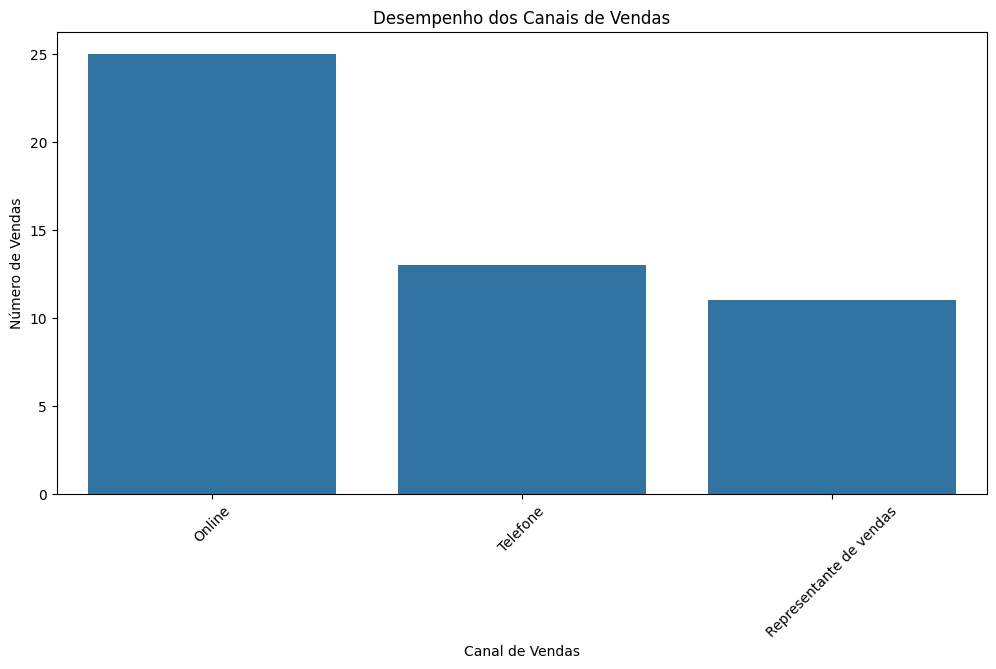

In [22]:
# Visualizar o desempenho dos diferentes canais de vendas em um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='Canal de Venda', data=df)
plt.title('Desempenho dos Canais de Vendas')
plt.xlabel('Canal de Vendas')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.show()

### Análise de Feedbacks dos Clientes

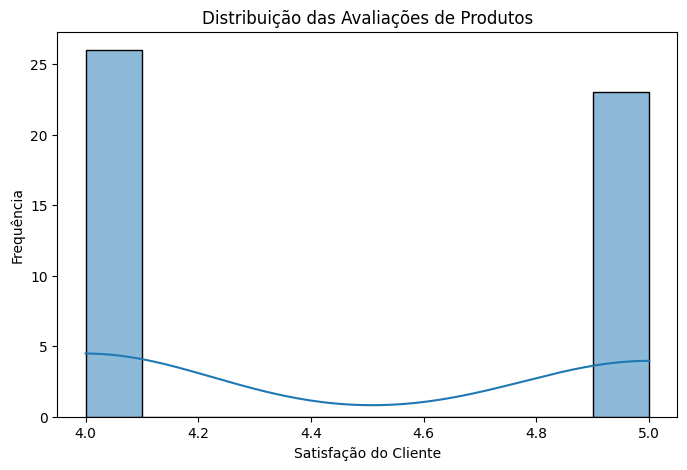

In [24]:
# Visualizar a distribuição das avaliações de produtos
plt.figure(figsize=(8, 5))
sns.histplot(df['Satisfação do Cliente'], bins=10, kde=True)
plt.title('Distribuição das Avaliações de Produtos')
plt.xlabel('Satisfação do Cliente')
plt.ylabel('Frequência')
plt.show()

### Rentabilidade por Produtos

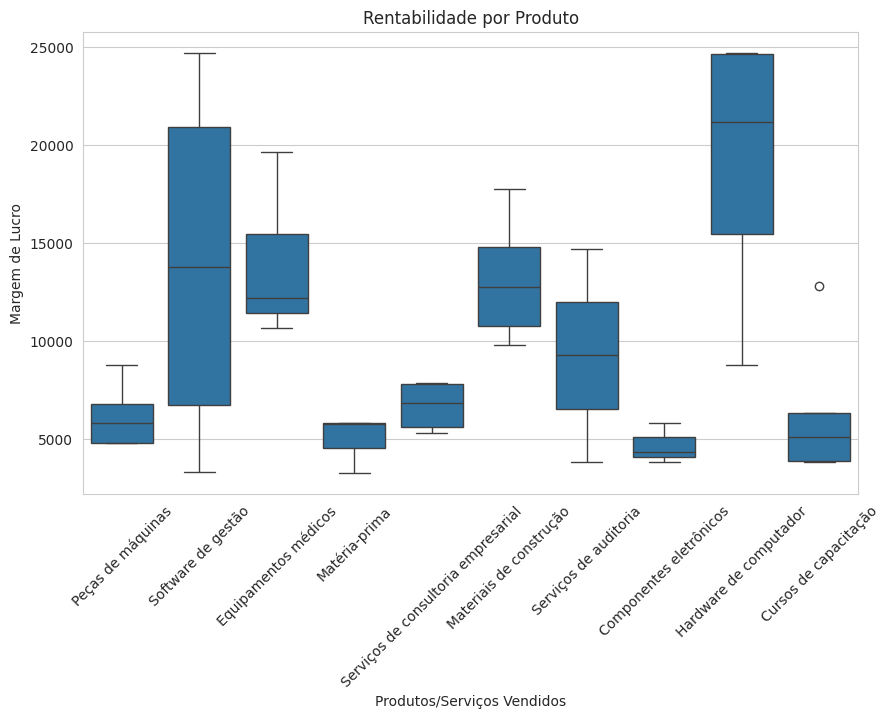

In [33]:
# Calcular a rentabilidade por produto
df['Rentabilidade por Produto'] = df['Valor da Transação'] - df['Custo de Aquisição de Cliente (CAC)']

# Visualizar a rentabilidade por produto em um gráfico de barras
plt.figure(figsize=(10, 6))
sns.boxplot(x='Produtos/Serviços Vendidos', y='Rentabilidade por Produto', data=df)
plt.title('Rentabilidade por Produto')
plt.xlabel('Produtos/Serviços Vendidos')
plt.ylabel('Margem de Lucro')
plt.xticks(rotation=45)
plt.show()

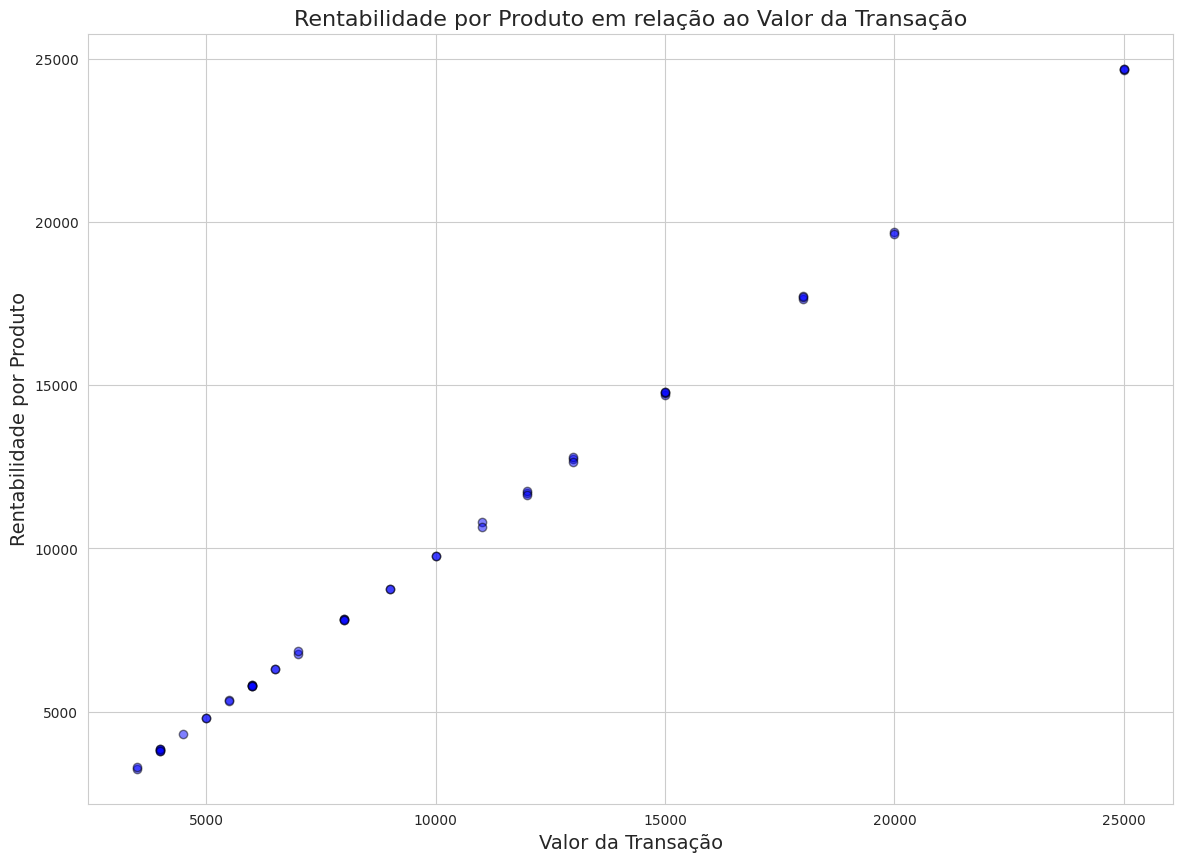

In [32]:
plt.figure(figsize=(14, 10))
plt.scatter(df['Valor da Transação'], df['Rentabilidade por Produto'], alpha=0.5, color='blue', edgecolors='black')
plt.title('Rentabilidade por Produto em relação ao Valor da Transação', fontsize=16)
plt.xlabel('Valor da Transação', fontsize=14)
plt.ylabel('Rentabilidade por Produto', fontsize=14)
plt.grid(True)
plt.show()